## Testing the ReFH2 loss removal 
### Notes:  
* Realised after creation of this script that the events had been in January and that this affects the removal of losses (less evaporation, so less loss removal).  
* Tested with making summer events for 95thP and mean for 4, 15 and 365 days and this showed that it did make a substantial difference to results.  
* However, haven't rerun the rest of the profiles as this would only be worthwhile if we wanted to do something with this analysis. So rest of this analysis is based on the winter profiles. 
* Could in future do more investigation into effect of antecedent conditions, however, this analysis does suggest that ReFH2 isn't that sensitive to antecedent conditions and so testing this in this way might be difficult.  

#### <ins> How do the antecedent conditions impact loss removal from observed events in ReFH2? </ins>
This script contains analysis of the impact of varying the antecedent conditions on the net rainfall generated by ReFH2.    

Daily antecedent conditions, calculated over the whole year: 
* The mean rainfall (1.78mm) for the catchment 
* The 25th percentile rainfall (0mm) for the catchment 
* The 50th percentile rainfall (0.1mm) for the catchment
* The 90th percentile rainfall (5.4mm) for the catchment
* The 95th percentile rainfall (8.6mm) for the catchment
* The 99th percentile rainfall (18.3mm) for the catchment 

JJA conditions -- The same synthetic rainfall events (for cluster numbers 1 and 5) were fed into ReFH2 multiple times, each time using different antecedent conditions. The antecedent condition options were:
* The mean rainfall (0.51mm) for the catchment 
* The 25th percentile rainfall (0mm) for the catchment 
* The 50th percentile rainfall (0mm) for the catchment
* The 90th percentile rainfall (0.4mm) for the catchment
* The 95th percentile rainfall (2.9mm) for the catchment
* The 99th percentile rainfall (11.9mm) for the catchment 


These were tested (in some cases) for application over:
* 4 days previous to the event
* 15 days previous to the event
* 365 days previous to the event

<!-- SURELY APPLYING THE SAME RAINFALL RATE FOR 365 DAYS BEFORE THE EVENT WOULD HAVE MASSIVE EFFEFCT??? -->

#### <ins> How does the removal of losses in observed events compare to the removal of losses for design events? </ins>
A 6 hour, 100 year return period event was created in ReFH2.  
The rainfall from this event was then fed back into ReFH2 as an observed event, using the variety of antecedent conditions specified above.  
This allowed comparison of the loss removal when the event was initially generated as a design event, and the loss removal when it was considered as an observed event. 

<!-- ### General results 
The <ins>wetter</ins> the antecedent conditions then the <ins> higher </ins> the net rainfall:
* Wetter antecedent conditions --> 
<!-- * A more saturated catchment with less ability to absorb water --> 
<!-- * Less subtraction of losses from the incident rainfall --> 
<!-- * A higher net rainfall -->

<!-- For the 97th percentile, the lengh of time the antecedent conditions are applied for makes no difference. This might be because supplying this level of rainfall for just one day (or upt o 3 days) already causes the catchment to be saturated.  -->

<!-- However, for the mean, the longer the antecedent conditions are supplied for then the lower the net rainfall. Lower net rainfall means that more losses have been subtracted, which suggests a drier catchment. Maybe in this case this is because the mean rainfall is lower than the rainfall amount that would be specified in the background?? -->

<!-- * Longer antecedent rainfall period - More losses removed  Drier catchment -
* Shorter antecedent rainfall period - Less losses removed  Wetter catchment - -->

#### Code initialisation

In [180]:
the_sum = round(data['Total net rain mm (Observed rainfall - 01/08/2022) - urbanised model'][0:total_duration_minutes].sum(),1)

35.3

In [189]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import dates as mdates
import matplotlib.patches as mpatches
import numpy as np
from datetime import datetime, timedelta

from Functions import * 

def make_plot(ax, stats, timeperiod, divide_plot_by, include_losses = False, plot_losses=False, legend = True):
    for col_num, string in enumerate(stats):
        data = pd.read_csv('PostLossRemovalData/IdealisedProfiles/6h_sp_fl_0.2/{}/{}_summer_urban.csv'.format(timeperiod, string))
        data['losses'] =round(data['Total net rain mm (Observed rainfall - 01/08/2022) - urbanised model']/data['Observed rainfall - 01/08/2022 00:00']*100,2)
        the_sum = round(data['Total net rain mm (Observed rainfall - 01/08/2022) - urbanised model'][0:total_duration_minutes].sum(),1)
        as_a_percent_of_original = int(the_sum/59.29 * 100)
        
        if divide_plot_by == 'stat':
            label = "{}: \ntotal rainfall = {}mm \n% of original = {}%".format(string.split('_')[1], the_sum, as_a_percent_of_original)
            title = string.split('_')[0] 
        else:
            label = "{}: \ntotal rainfall = {}mm \n% of original = {}%".format(string.split('_')[0], the_sum, as_a_percent_of_original)
            title = string.split('_')[1] 
            
        # Plot the rainfall after losses removed
        if plot_losses == False:
            ax.plot(range(0,total_duration_minutes), 
                     data['Total net rain mm (Observed rainfall - 01/08/2022) - urbanised model'][0:total_duration_minutes],
                    color = cols[col_num], label = label)
            if include_losses == True:
                pre_loss_removal = pd.read_csv('../IdealisedProfiles/6hr_100yrRP/PreLossRemoval/6h_sp_fl_0.2.csv', names = ['Time', 'Rainfall'])
                pre_loss_removal['Time'] = post_loss_removal_df['Time'][0:total_duration_minutes]
                ax.plot(pre_loss_removal['Time'], pre_loss_removal['Rainfall'], color = 'black', linestyle = 'dashed',
                        label = 'prelossremoval')
        # Plot just the losses
        else:
             ax.plot(range(0,total_duration_minutes), data['losses'][0:total_duration_minutes],
                    color = cols[col_num], label = "{}: \ntotal rainfall = {}mm \n% of original = {}mm".format(string, the_sum, as_a_percent_of_original))
    if legend==True:            
        ax.legend(loc="upper right", fontsize=6)  
        ax.set_title(title)
    
    if plot_losses == True:
        ax.set_ylabel("Losses removed (mm)")
    else:
        ax.set_ylabel("Rainfall (mm)")        
    ax.set_xlabel("Minutes")

def make_comparison_plot(ax, stats, include_losses = False):
    for col_num, string in enumerate(stats):
        data = pd.read_csv('PostLossRemovalData/IdealisedProfiles/6h_sp_fl_0.2/{}_summer_urban.csv'.format(string))
        the_sum = round(data['Total net rain mm (Observed rainfall - 01/08/2022) - urbanised model'][0:total_duration_minutes].sum(),1)
        ax.plot(range(0,total_duration_minutes), 
                 data['Total net rain mm (Observed rainfall - 01/08/2022) - urbanised model'][0:total_duration_minutes],
                color = cols[col_num], label = "{}: \ntotal rainfall = {}mm".format(string.split('/')[0], the_sum))
    
    if include_losses == True:
        pre_loss_removal = pd.read_csv('../IdealisedProfiles/6hr_100yrRP/PreLossRemoval/6h_sp_fl_0.2.csv', names = ['Time', 'Rainfall'])
        pre_loss_removal['Time'] = post_loss_removal_df['Time'][0:total_duration_minutes]
        ax.plot(pre_loss_removal['Time'], pre_loss_removal['Rainfall'], color = 'black', linestyle = 'dashed', label = 'prelossremoval')
    
    ax.legend(loc="upper right", fontsize=8)  
    ax.set_title(string.split('/')[1])
    ax.set_xlabel("Minutes")
    ax.set_ylabel("Rainfall (mm)")    

### ReFH2 comparison

In [233]:
post_loss_removal_df

,Time,Observed rainfall - 01/08/2022 00:00,Urban net rain mm (Observed rainfall - 01/08/2022) - urbanised model,Rural net rain mm (Observed rainfall - 01/08/2022) - urbanised model,Sewer loss m3/s (Observed rainfall - 01/08/2022) - urbanised model,Total net rain mm (Observed rainfall - 01/08/2022) - urbanised model,Direct runoff m3/s (Observed rainfall - 01/08/2022) - urbanised model,Baseflow m3/s (Observed rainfall - 01/08/2022) - urbanised model,Total flow m3/s (Observed rainfall - 01/08/2022)- urbanised model
0,0,0.034740,0.002951,0.005986,0,0.008937,0.000000,0.385866,0.385866
1,1,0.035750,0.003037,0.006163,0,0.009200,0.000009,0.385738,0.385747
2,2,0.036793,0.003126,0.006345,0,0.009471,0.000037,0.385610,0.385646
3,3,0.037871,0.003218,0.006534,0,0.009752,0.000084,0.385481,0.385565
4,4,0.038984,0.003313,0.006729,0,0.010042,0.000150,0.385353,0.385503
...,...,...,...,...,...,...,...,...,...
355,355,0.035620,0.004010,0.010354,0,0.014364,8.463217,0.882139,9.345357
356,356,0.035366,0.003982,0.010282,0,0.014264,8.495294,0.886432,9.381726
357,357,0.035113,0.003954,0.010211,0,0.014166,8.527137,0.890745,9.417882
358,358,0.034863,0.003927,0.010141,0,0.014067,8.558754,0.895077,9.453831


In [234]:
def singlepeak_plot(ax, options, cols, include_post_loss_removal = True):
    # List to store patches to make legend
    patches = []
    # Plot each of the antecedent condition options, and add a patch for to patches list for legend
    for number,option in enumerate(options):
        # Read in data, clean it and plot it
        post_loss_removal_df = pd.read_csv("PostLossRemovalData/ObservedProfiles/{}/singlepeak_urban_summer.csv".format(option))
        post_loss_removal_df = clean_dfs(post_loss_removal_df)
        print(post_loss_removal_df.columns)
        the_sum = round(post_loss_removal_df['Total net rain mm (Observed rainfall - 01/08/2022) - urbanised model'][0:361].sum(),1)
        as_a_percent_of_original = int(the_sum/59.29 * 100)
        
        ax.plot(post_loss_removal_df['Time'],
                post_loss_removal_df[post_loss_removal_df.columns[5]], color = cols[number],
                   label = "{}: \ntotal rainfall = {}mm \n% of original = {}%".format(option, the_sum, as_a_percent_of_original))
    
    # Include the ReFH2 design rainfall post loss removal
    pre_loss_removal = pd.read_csv("PostLossRemovalData/ObservedProfiles/SinglePeak_6h1_1min_100yr/Urban.csv")
    pre_loss_removal['Time'] = post_loss_removal_df['Time'][0:361]
    ax.plot(pre_loss_removal['Time'], pre_loss_removal['Total net rain mm (100 year) - urbanised model'], color = 'black',
           label = 'ReFH2 loss removal')
    
    # Include data before losses removed
    if include_post_loss_removal ==True:
        ax.plot(pre_loss_removal['Time'], pre_loss_removal['100 year design rainfall - FEH 2013 model'], color = 'black',
            linestyle = 'dotted', label = 'ReFH2 loss removal')

    # Format plot    
    ax.set_xlabel("Minutes")
    ax.set_ylabel("Rainfall (mm)")
    ax.legend(loc="upper right", fontsize=8)

In [238]:
option = '99thP_15days'
post_loss_removal_df = pd.read_csv("PostLossRemovalData/ObservedProfiles/{}/singlepeak_urban_summer.csv".format(option))
print(post_loss_removal_df.columns)

Index(['Time', 'Observed rainfall - 01/01/2022 00:00',
       'Urban net rain mm (Observed rainfall - 01/01/2022) - urbanised model',
       'Rural net rain mm (Observed rainfall - 01/01/2022) - urbanised model',
       'Sewer loss m3/s (Observed rainfall - 01/01/2022) - urbanised model',
       'Total net rain mm (Observed rainfall - 01/01/2022) - urbanised model',
       'Direct runoff m3/s (Observed rainfall - 01/01/2022) - urbanised model',
       'Baseflow m3/s (Observed rainfall - 01/01/2022) - urbanised model',
       'Total flow m3/s (Observed rainfall - 01/01/2022)- urbanised model'],
      dtype='object')


Index(['Time', 'Observed rainfall - 01/01/2022 00:00',
       'Urban net rain mm (Observed rainfall - 01/01/2022) - urbanised model',
       'Rural net rain mm (Observed rainfall - 01/01/2022) - urbanised model',
       'Sewer loss m3/s (Observed rainfall - 01/01/2022) - urbanised model',
       'Total net rain mm (Observed rainfall - 01/01/2022) - urbanised model',
       'Direct runoff m3/s (Observed rainfall - 01/01/2022) - urbanised model',
       'Baseflow m3/s (Observed rainfall - 01/01/2022) - urbanised model',
       'Total flow m3/s (Observed rainfall - 01/01/2022)- urbanised model'],
      dtype='object')


KeyError: 'Total net rain mm (Observed rainfall - 01/08/2022) - urbanised model'

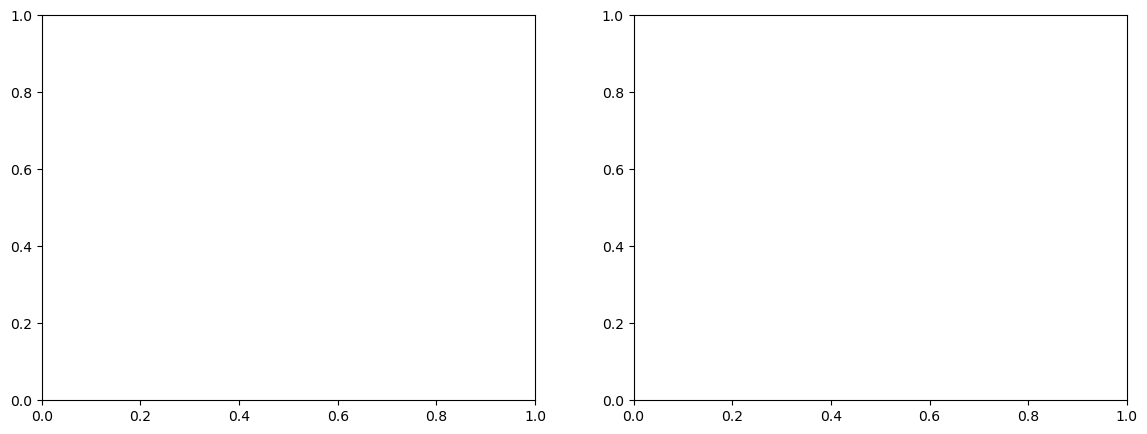

In [235]:
options = ['Mean_15days', '95thP_15days', '99thP_15days']
cols = ['#248624', '#48a948', '#6ccb6c', '#90ee90']
fig, axs = plt.subplots(1,2,  figsize = (14,5))
singlepeak_plot(axs[0],options, cols, False)
singlepeak_plot(axs[1], options,cols)

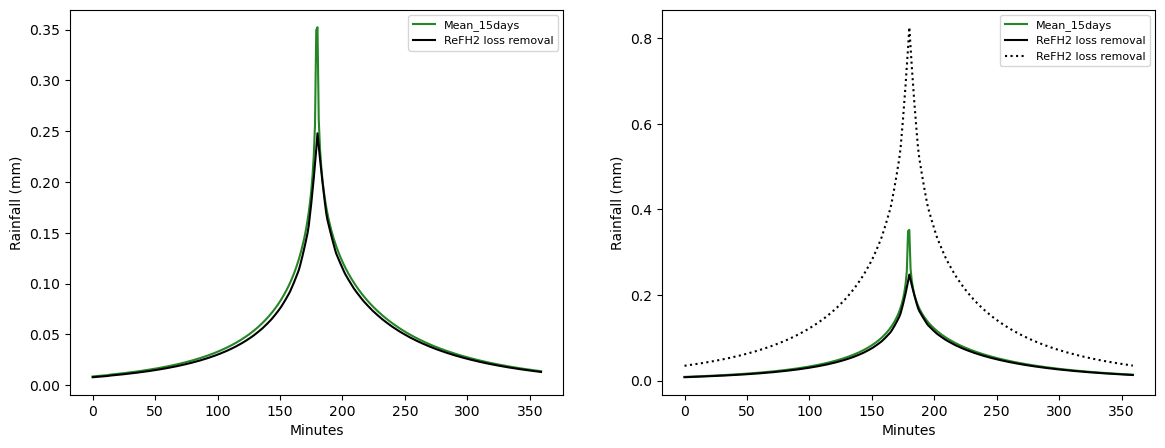

In [230]:
options = ['Mean_15days']
cols = ['#248624', '#48a948', '#6ccb6c', '#90ee90']
fig, axs = plt.subplots(1,2,  figsize = (14,5))
singlepeak_plot(axs[0],options, cols, False)
singlepeak_plot(axs[1], options,cols)

In [ ]:
cols = ['#0055aa', '#00aad5', '#00ffff']#, '#60c060', '#309230', '#006400']
timeperiod = 'jja'
fig, ax = plt.subplots(nrows = 2, ncols = 4, figsize =(15,6), sharey= 'row', sharex=True)
fig.suptitle("JJA antecedent conditions", y=1.01, fontsize=22)
make_plot(ax[0,0], ['99thP_4days', '99thP_15days', '99thP_365days'], timeperiod,'stat', False)
make_plot(ax[0,1], ['95thP_4days', '95thP_15days', '95thP_365days'], timeperiod,'stat', False)
make_plot(ax[0,2], [ 'mean_4days', 'mean_15days', 'mean_365days'], timeperiod,'stat', False)
make_plot(ax[0,3], ['88thP_4days', '88thP_15days', '88thP_365days'], timeperiod,'stat', False)

make_plot(ax[1,0], ['99thP_4days', '99thP_15days', '99thP_365days'],timeperiod, False, 'stat',plot_losses=True, legend=False)
make_plot(ax[1,1], ['95thP_4days', '95thP_15days', '95thP_365days'],timeperiod, False,'stat', plot_losses=True, legend=False)
make_plot(ax[1,2], [ 'mean_4days', 'mean_15days', 'mean_365days'], timeperiod,False, 'stat',plot_losses=True, legend=False)
make_plot(ax[1,3], ['88thP_4days', '88thP_15days', '88thP_365days'], timeperiod,False,'stat', plot_losses=True, legend=False)

## JJA

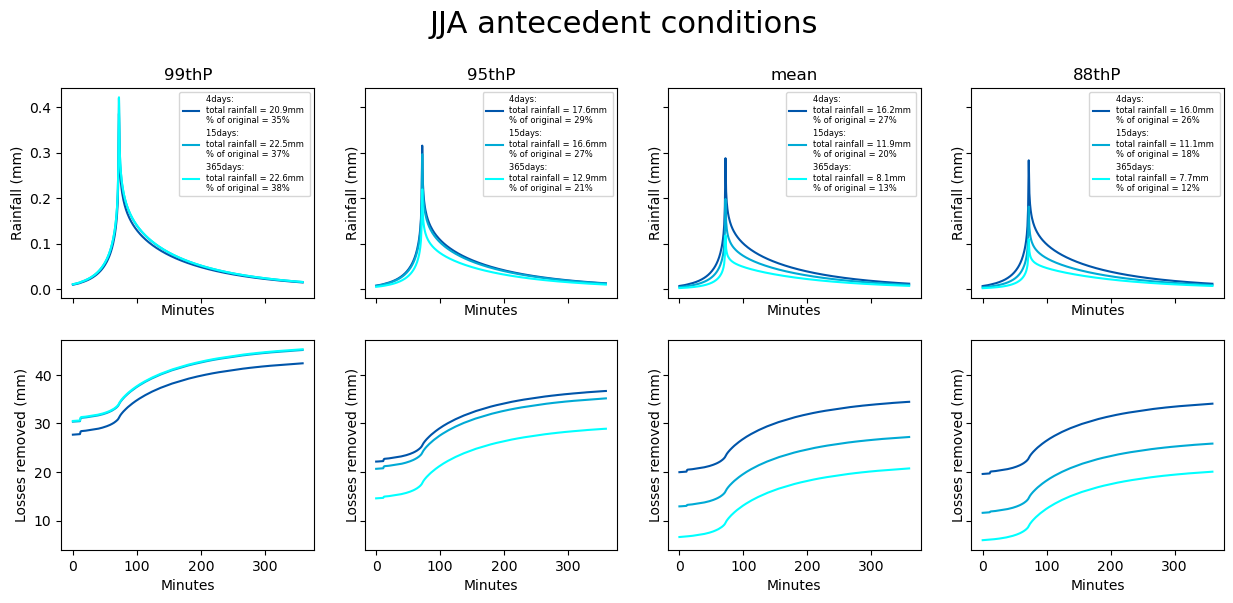

In [192]:
cols = ['#0055aa', '#00aad5', '#00ffff']#, '#60c060', '#309230', '#006400']
timeperiod = 'jja'
fig, ax = plt.subplots(nrows = 2, ncols = 4, figsize =(15,6), sharey= 'row', sharex=True)
fig.suptitle("JJA antecedent conditions", y=1.01, fontsize=22)
make_plot(ax[0,0], ['99thP_4days', '99thP_15days', '99thP_365days'], timeperiod,'stat', False)
make_plot(ax[0,1], ['95thP_4days', '95thP_15days', '95thP_365days'], timeperiod,'stat', False)
make_plot(ax[0,2], [ 'mean_4days', 'mean_15days', 'mean_365days'], timeperiod,'stat', False)
make_plot(ax[0,3], ['88thP_4days', '88thP_15days', '88thP_365days'], timeperiod,'stat', False)

make_plot(ax[1,0], ['99thP_4days', '99thP_15days', '99thP_365days'],timeperiod, False, 'stat',plot_losses=True, legend=False)
make_plot(ax[1,1], ['95thP_4days', '95thP_15days', '95thP_365days'],timeperiod, False,'stat', plot_losses=True, legend=False)
make_plot(ax[1,2], [ 'mean_4days', 'mean_15days', 'mean_365days'], timeperiod,False, 'stat',plot_losses=True, legend=False)
make_plot(ax[1,3], ['88thP_4days', '88thP_15days', '88thP_365days'], timeperiod,False,'stat', plot_losses=True, legend=False)

#### Considering the impact of the number of days of antecedent conditions supplied

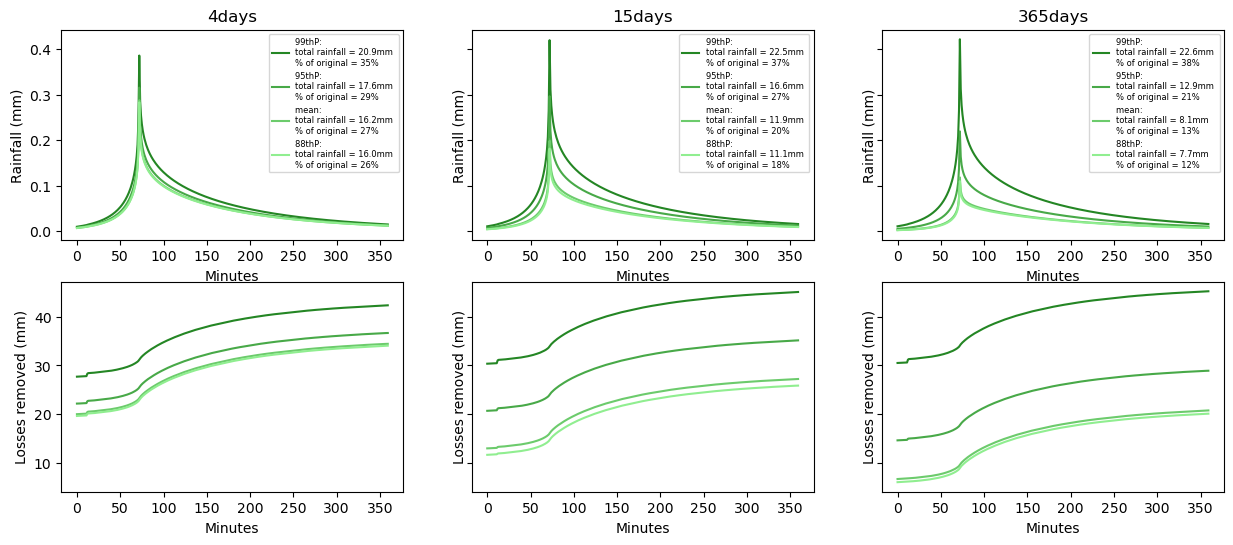

In [193]:
cols = ['#248624', '#48a948', '#6ccb6c', '#90ee90']
fig, ax = plt.subplots(nrows=2, ncols = 3, figsize =(15,6), sharey= 'row')
make_plot(ax[0,0], ['99thP_4days', '95thP_4days','mean_4days', '88thP_4days'], timeperiod,'n_days',False)
make_plot(ax[0,1], ['99thP_15days', '95thP_15days','mean_15days', '88thP_15days'], timeperiod, 'n_days',False)
make_plot(ax[0,2], ['99thP_365days', '95thP_365days','mean_365days', '88thP_365days'], timeperiod, 'n_days',False)

make_plot(ax[1,0], ['99thP_4days', '95thP_4days','mean_4days', '88thP_4days'], timeperiod,'n_days', False, plot_losses=True, legend=False)
make_plot(ax[1,1], ['99thP_15days', '95thP_15days','mean_15days', '88thP_15days'], timeperiod, 'n_days',False, plot_losses=True, legend=False)
make_plot(ax[1,2], ['99thP_365days', '95thP_365days','mean_365days', '88thP_365days'], timeperiod, 'n_days',False, plot_losses=True, legend=False)

### Whole year

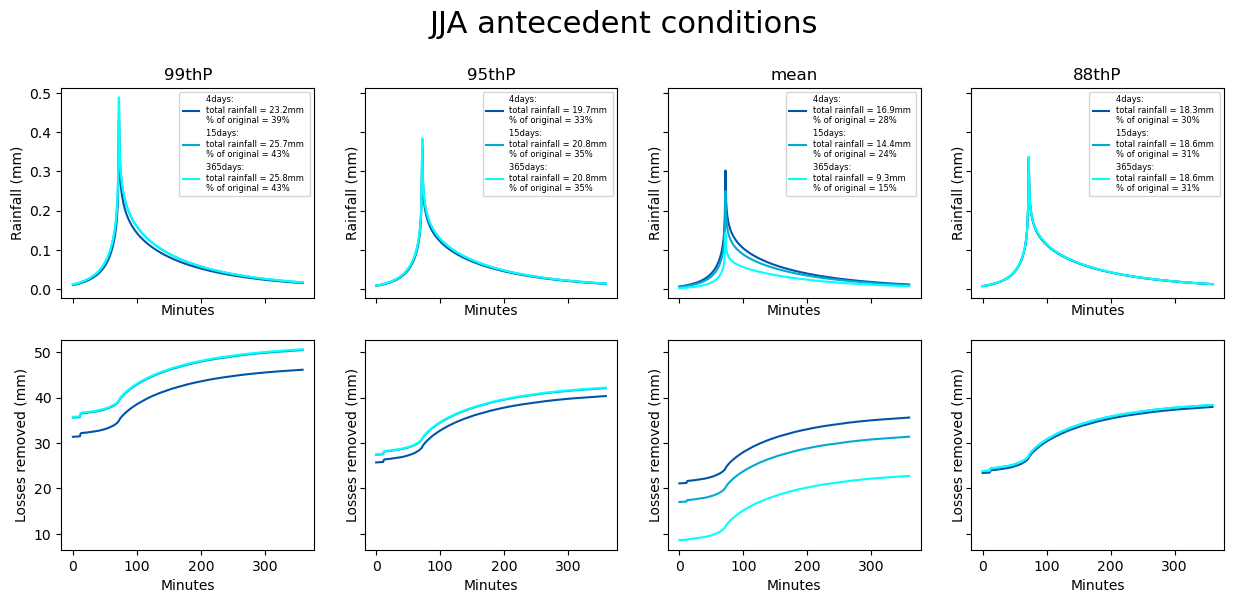

In [194]:
cols = ['#0055aa', '#00aad5', '#00ffff']#, '#60c060', '#309230', '#006400']
timeperiod = 'wholeyear'
fig, ax = plt.subplots(nrows = 2, ncols = 4, figsize =(15,6), sharey= 'row', sharex=True)
fig.suptitle("JJA antecedent conditions", y=1.01, fontsize=22)
make_plot(ax[0,0], ['99thP_4days', '99thP_15days', '99thP_365days'], timeperiod,'stat', False)
make_plot(ax[0,1], ['95thP_4days', '95thP_15days', '95thP_365days'], timeperiod,'stat', False)
make_plot(ax[0,2], [ 'mean_4days', 'mean_15days', 'mean_365days'], timeperiod,'stat', False)
make_plot(ax[0,3], ['88thP_4days', '88thP_15days', '88thP_365days'], timeperiod,'stat', False)

make_plot(ax[1,0], ['99thP_4days', '99thP_15days', '99thP_365days'],timeperiod, False, 'stat',plot_losses=True, legend=False)
make_plot(ax[1,1], ['95thP_4days', '95thP_15days', '95thP_365days'],timeperiod, False,'stat', plot_losses=True, legend=False)
make_plot(ax[1,2], [ 'mean_4days', 'mean_15days', 'mean_365days'], timeperiod,False, 'stat',plot_losses=True, legend=False)
make_plot(ax[1,3], ['88thP_4days', '88thP_15days', '88thP_365days'], timeperiod,False,'stat', plot_losses=True, legend=False)

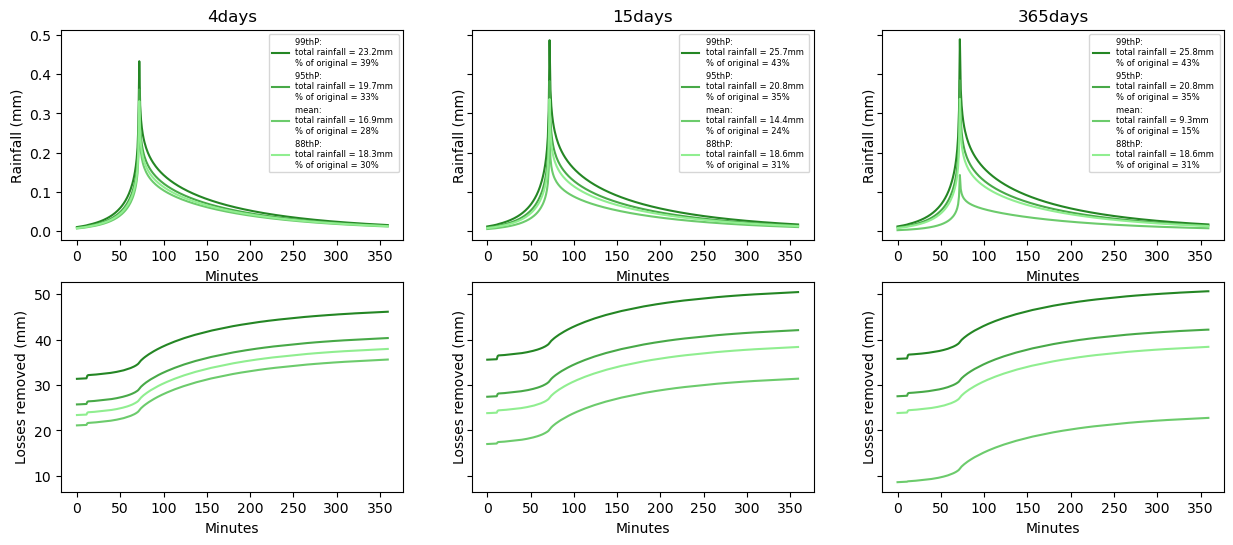

In [195]:
timeperiod = 'wholeyear'
cols = ['#248624', '#48a948', '#6ccb6c', '#90ee90']
fig, ax = plt.subplots(nrows=2, ncols = 3, figsize =(15,6), sharey= 'row')
make_plot(ax[0,0], ['99thP_4days', '95thP_4days','mean_4days', '88thP_4days'], timeperiod,'n_days',False)
make_plot(ax[0,1], ['99thP_15days', '95thP_15days','mean_15days', '88thP_15days'], timeperiod, 'n_days',False)
make_plot(ax[0,2], ['99thP_365days', '95thP_365days','mean_365days', '88thP_365days'], timeperiod, 'n_days',False)

make_plot(ax[1,0], ['99thP_4days', '95thP_4days','mean_4days', '88thP_4days'], timeperiod,'n_days', False, plot_losses=True, legend=False)
make_plot(ax[1,1], ['99thP_15days', '95thP_15days','mean_15days', '88thP_15days'], timeperiod, 'n_days',False, plot_losses=True, legend=False)
make_plot(ax[1,2], ['99thP_365days', '95thP_365days','mean_365days', '88thP_365days'], timeperiod, 'n_days',False, plot_losses=True, legend=False)

### Compare whole year and JJA

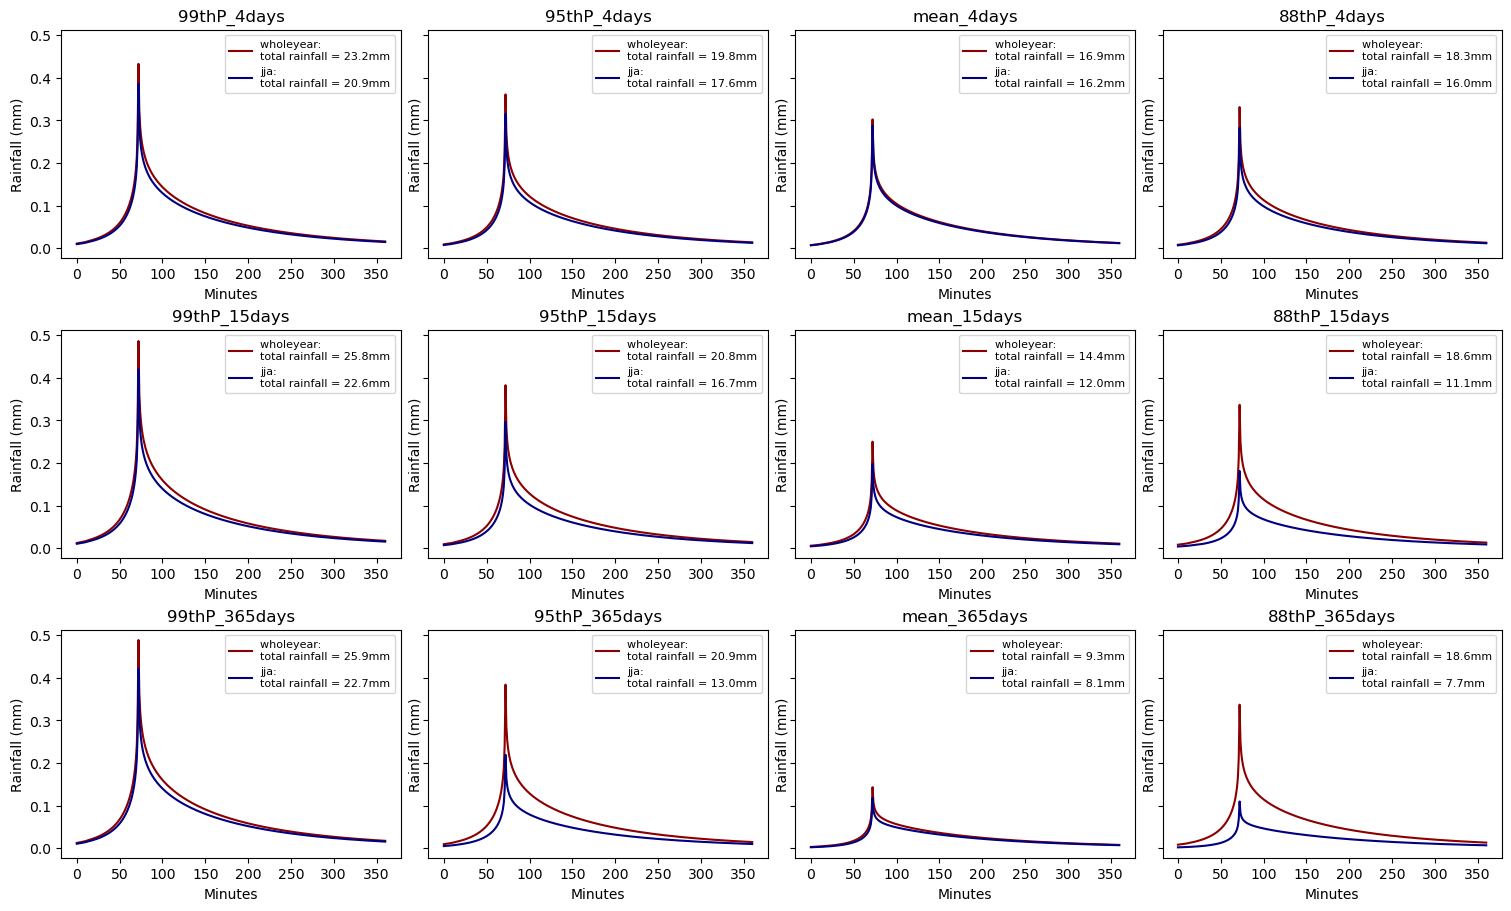

In [97]:
cols = ['darkred', 'navy']

fig, ax = plt.subplots(nrows=3, ncols = 4, figsize =(15,9), sharey= True, constrained_layout=True)
make_comparison_plot(ax[0,0], ['wholeyear/99thP_4days', 'jja/99thP_4days', ], False)
make_comparison_plot(ax[0,1], ['wholeyear/95thP_4days', 'jja/95thP_4days', ], False)
make_comparison_plot(ax[0,2], ['wholeyear/mean_4days', 'jja/mean_4days', ], False)
make_comparison_plot(ax[0,3], ['wholeyear/88thP_4days', 'jja/88thP_4days', ], False)

make_comparison_plot(ax[1,0], ['wholeyear/99thP_15days', 'jja/99thP_15days', ], False)
make_comparison_plot(ax[1,1], ['wholeyear/95thP_15days', 'jja/95thP_15days', ], False)
make_comparison_plot(ax[1,2], ['wholeyear/mean_15days', 'jja/mean_15days', ], False)
make_comparison_plot(ax[1,3], ['wholeyear/88thP_15days', 'jja/88thP_15days', ], False)

make_comparison_plot(ax[2,0], ['wholeyear/99thP_365days', 'jja/99thP_365days', ], False)
make_comparison_plot(ax[2,1], ['wholeyear/95thP_365days', 'jja/95thP_365days', ], False)
make_comparison_plot(ax[2,2], ['wholeyear/mean_365days', 'jja/mean_365days', ], False)
make_comparison_plot(ax[2,3], ['wholeyear/88thP_365days', 'jja/88thP_365days', ], False)

  
## Considering the impact of the magnitude of the daily rainfall supplied
<ins>Logic</ins>:
* ReFH2 requires a daily rainfall rate to be supplied which helps determine the initial catchment wetness
* How much difference will the magnitude of the daily rainfall supplied to ReFH2 make to resulting net rainfall rate?

<ins>Method</ins>:
* The net rainfall rate after removal of losses are compared for cases in which the mean, 50th, 90th and 95th percentile daily rainfall rate are applied on each day for 4, 15 and 365 days before onset of the event being modelled.  

<ins>Results</ins>:    
* In all cases: at higher percentiles, with wetter antecedent conditions, the loss removal is smaller (as expected) because the catchment is already more saturated. 
* As the length of time over which the antecedent conditions are supplied for increases, so does the difference in net rainfall rate between lower and higher antecedent daily rainfall conditions.  

<ins>Conclusions</ins>:  
* ?


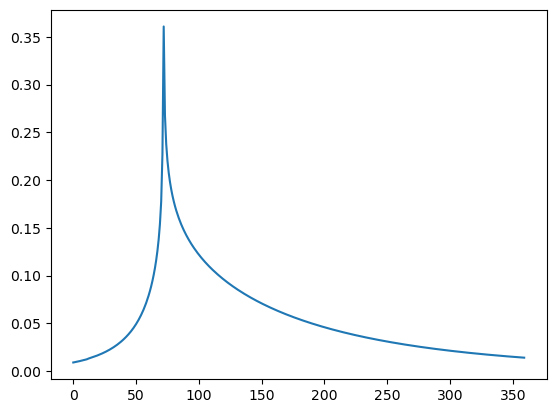

In [4]:
post_loss_removal_df = pd.read_csv('PostLossRemovalData/IdealisedProfiles/6h_sp_fl_0.2/{}_summer_urban.csv'.format('wholeyear/95thP_4days'))
post_loss_removal_df = clean_dfs(post_loss_removal_df)
plt.plot(post_loss_removal_df['Time'], post_loss_removal_df[post_loss_removal_df.columns[5]])

In [ ]:
# def make_plot (ax, cluster_num, options, colors_dict, legend_position, include_pre_losses= True):
# Create the patches for legend
patches = []
# Plot each of the antecedent condition options, and add a patch for to patches list for legend
for number,option in enumerate(options):
    if 'days' in list(colors_dict.keys())[0]:
        color = colors_dict[option.split('_')[1]]
    else: 
        color = colors_dict[option.split('_')[0]]

    # Add to patches
    patch = mpatches.Patch(color=color, label=options[number])
    patches.append(patch)
    # Read in data, clean it and plot it
    post_loss_removal_df = pd.read_csv("PostLossRemoval/{}/cluster{}_urban_summer.csv".format(option, cluster_num))
    post_loss_removal_df = clean_dfs(post_loss_removal_df)
    ax.plot(post_loss_removal_df['Time'], post_loss_removal_df[post_loss_removal_df.columns[5]], color = color)

# Include a line before the losses were removed
if include_pre_losses == True:
    pre_loss_removal = pd.read_csv(roberto_profiles_fp + "PreLossRemoval/6hr_100yrRP/cluster{}.csv".format(cluster_num), names = ['Time', 'Rainfall'])
    pre_loss_removal['Time'] = post_loss_removal_df['Time'][0:360]
    ax.plot(pre_loss_removal['Time'], pre_loss_removal['Rainfall'], color = 'black', linestyle = 'dashed')
    patch = mpatches.Patch(color='black', label='Pre Loss Removal', linestyle = 'dashed')
    patches.append(patch)

ax.set_xlabel("Minutes")
ax.set_ylabel("Rainfall (mm)")

if cluster_num == 5 and include_pre_losses == True:
    ax.legend(handles=patches, loc=legend_position, fontsize= 10)

make_plot(ax1, 1, lists[0],cols_dict, 'upper right', False)       

FileNotFoundError: [Errno 2] No such file or directory: 'PostLossRemoval/50thP_4days/cluster1_urban_summer.csv'

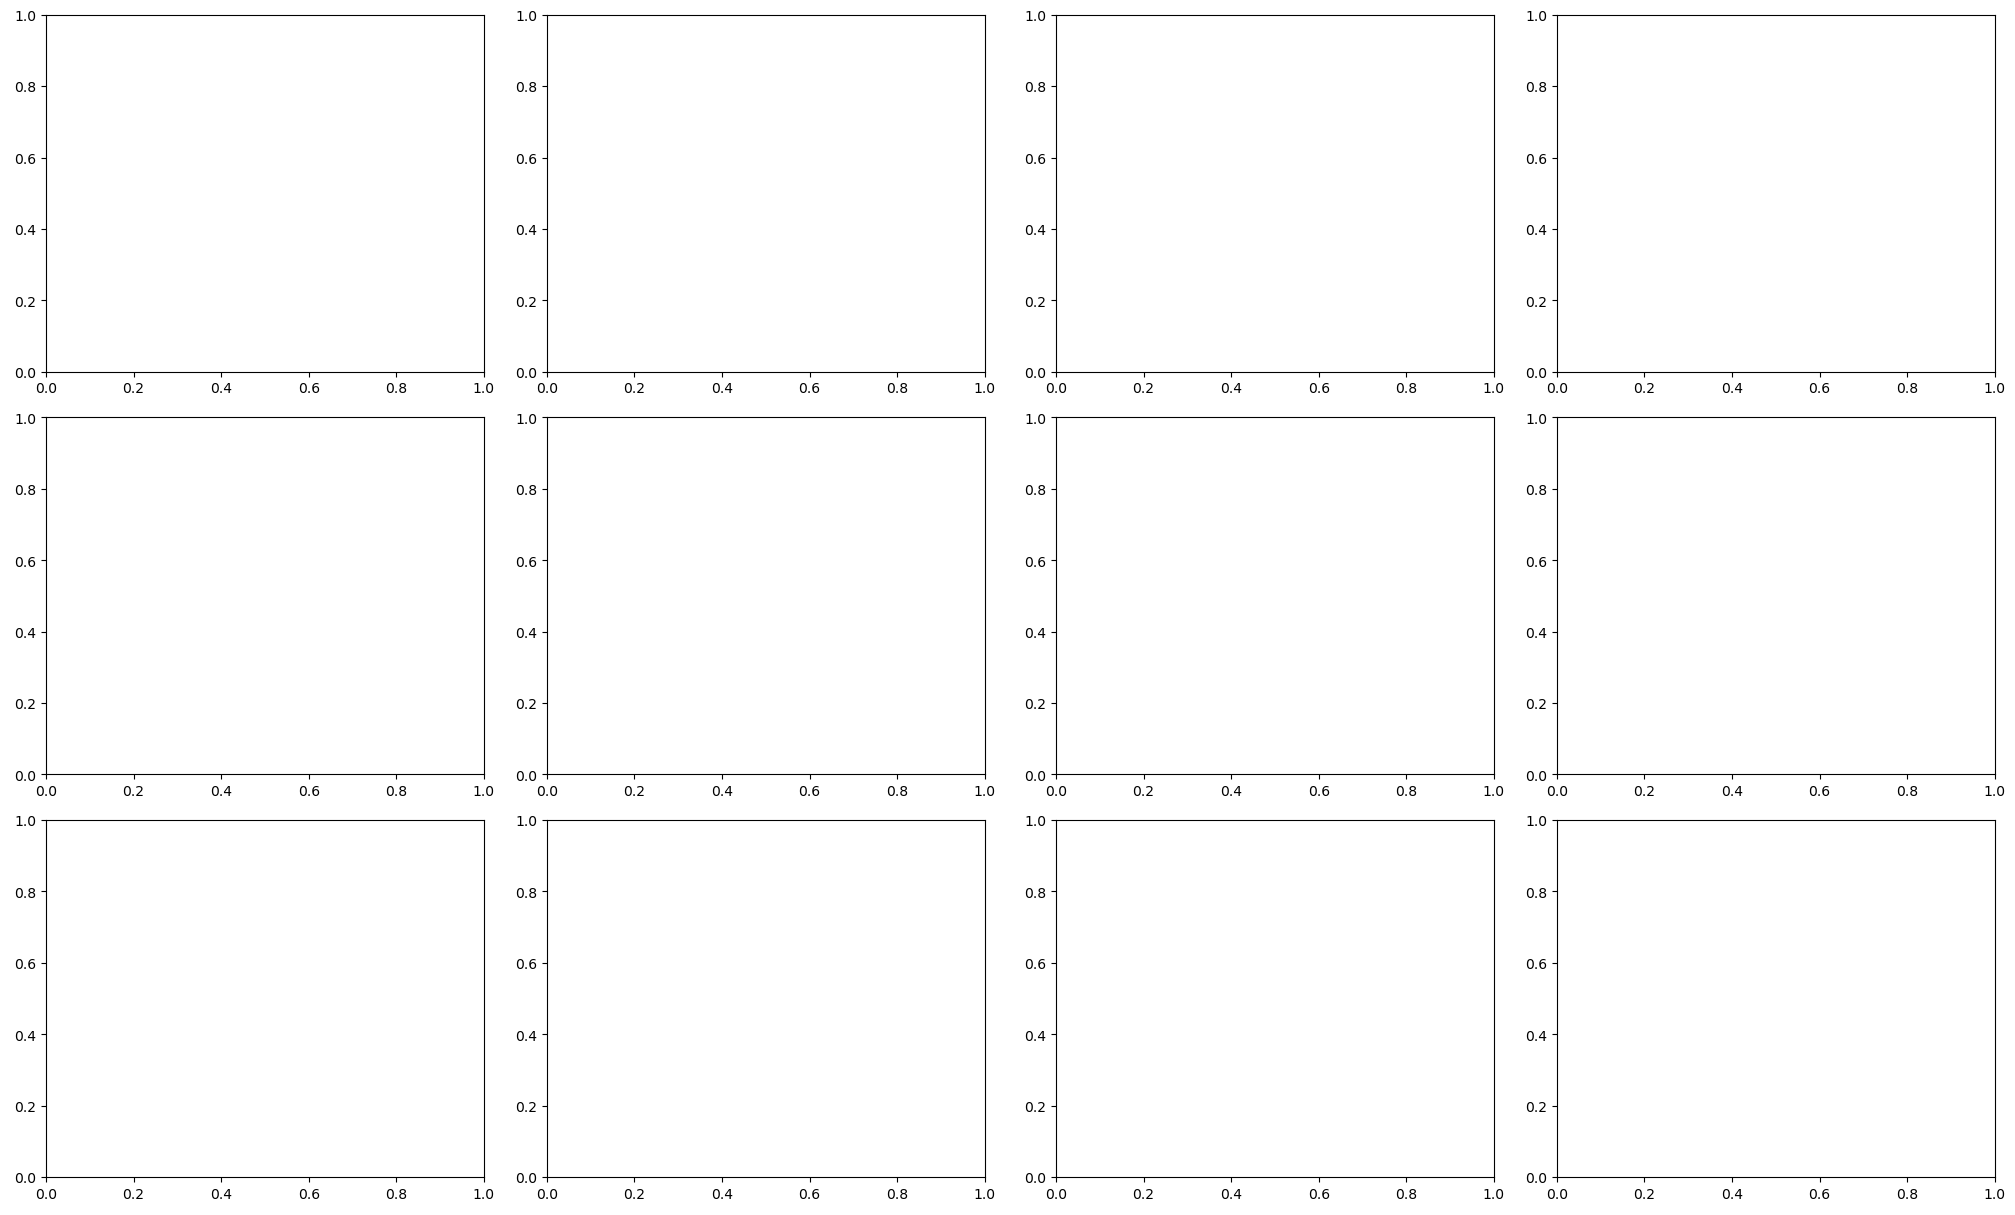

In [5]:
# Define colors to use in plotting
cols_dict = {'25thP': 'purple', '50thP': 'magenta', "90thP": 'gold',  "95thP": 'green', "99thP": 'blue', "Mean": 'red',
            "SummerMean": 'brown', "Summer95thP": 'dodgerblue'}
# List variables to plot and labels to give them
ls_15days = ['50thP_15days', "90thP_15days",  "95thP_15days", "Mean_15days"]
ls_4days = ['50thP_4days', "90thP_4days",  "95thP_4days", "Mean_4days"]
ls_365days = ['50thP_365days', "90thP_365days",  "95thP_365days", "Mean_365days"]
lists = [ls_4days, ls_15days, ls_365days]
titles = ['4 days', '15 days', '365 days']
# PLot 
plot_results ('day', cols_dict, lists, titles)

### Plot the losses

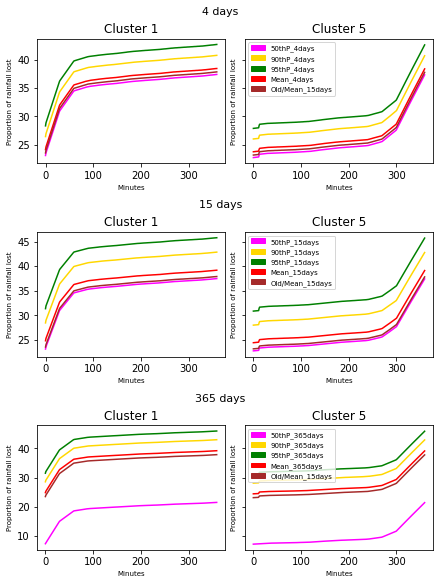

In [92]:
plot_results_losses('day', cols_dict, lists, titles)

## Considering the impact of the number of days of antecedent conditions supplied
<ins>Logic</ins>:
* Antecedent conditions can be supplied to ReFH2 for 3-365 days. 
* How much difference will the number of days of antecedent data supplied to ReFH2 make to resulting net rainfall rate?

<ins>Method</ins>:
* The net rainfall rate after removal of losses are compared for cases in which the mean, 50th, 90th and 95th percentile daily rainfall rate are applied on each day for 4, 15 and 365 days before onset of the event being modelled.  

<ins>Results</ins>:
* 50thP - highest net rainfall for 4/15 days, lower rate for 365 days
* Mean - highest net rainfall for 15/365 days, very marginally lower rate for 4 days 
* 90thP - highest net rainfall for 15/365 days, lower rate for 4 days
* 95thP - highest net rainfall for 15/365 days, lower rate for 4 days

<ins>Conclusions</ins>:
* A higher net rainfall rate means that fewer losses have been subtracted which suggests that the catchment is initially wetter.
* For a lower rainfall rate (50th percentile) supplying more days of antecedent data results in a lower net rainfall rate, whereas for higher rainfall rates (mean, 90th/95th percentiles) supplying more days of antecedent data leads to a higher net rainfall rate
* This suggests that where only a few days of data are given, ReFH2 will use some other internal calculations of antecedent conditions, and that the assumptions made in this will result in a wetter catchment than the 50th percentile, a similarly wet catchment to the mean, and a drier catchment than higher percentiles.  

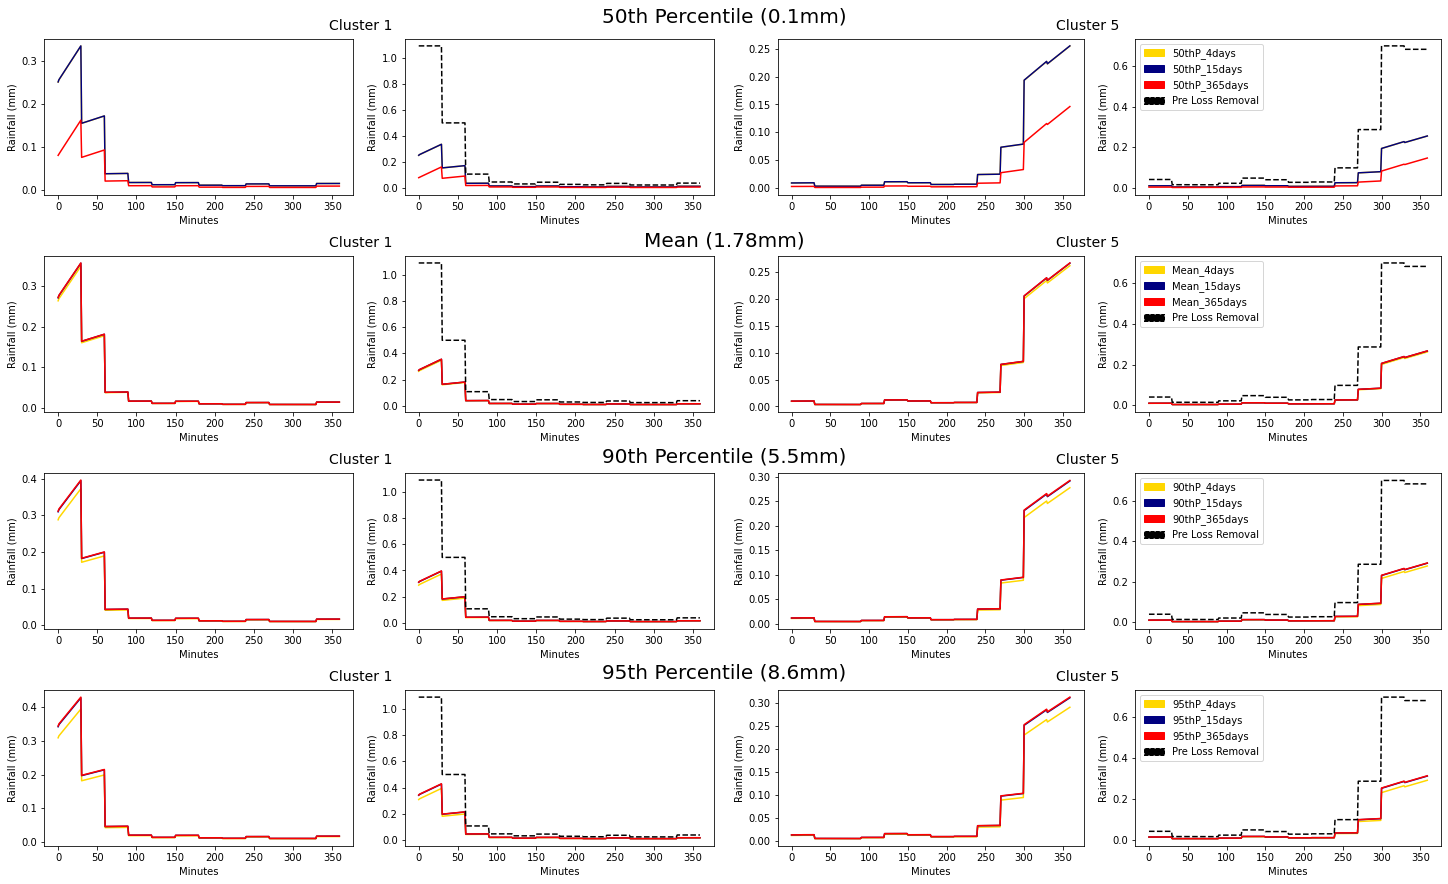

In [3]:
# Define colors to use in plotting
cols_dict_percentiles = {'4days': 'gold', '15days': 'navy', "365days": 'red'}
# List variables to plot and labels to give them
ls_50thP = ['50thP_4days', "50thP_15days", "50thP_365days"]
ls_mean = ['Mean_4days', "Mean_15days", "Mean_365days"]
ls_90thP = ['90thP_4days', "90thP_15days", "90thP_365days"]
ls_95thP = ['95thP_4days', "95thP_15days", "95thP_365days"]
lists_percentiles = [ls_50thP,ls_mean, ls_90thP, ls_95thP]
titles_percentiles = ['50th Percentile (0.1mm)', "Mean (1.78mm)", '90th Percentile (5.5mm)', '95th Percentile (8.6mm)']
# Plot 
plot_results ('percentile', cols_dict_percentiles, lists_percentiles, titles_percentiles)

### Plot the losses

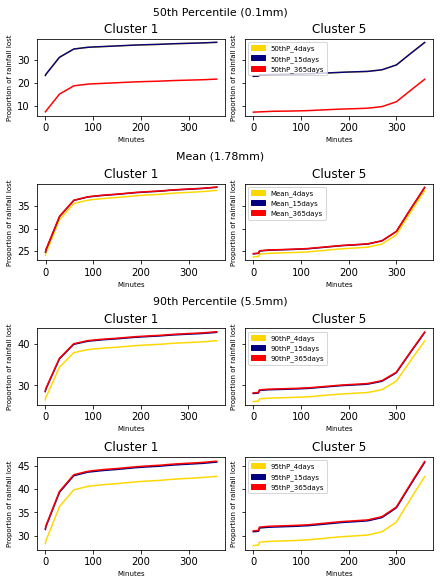

In [89]:
plot_results_losses('percentile', cols_dict_percentiles, lists_percentiles, titles_percentiles)

## Comparing the removal of losses in observed events to loss removal in design events
<ins>Logic</ins>:
* When design events are produced in ReFH2, no antecedent conditions need to be provided; whereas, when observed events are provided to ReFH2 then antecedent conditions are needed to allow subtraction of losses from the observed event. 
* We are interested in comparing the loss removal when an event is initially generated as a design event, and the loss removal when it is considered as an observed event.

<ins>Method</ins>:
* A 6 hour, 100 year return period event was created in ReFH2. 
* The rainfall from this event was then fed back into ReFH2 as an observed event, using the variety of antecedent conditions specified above. 

<ins>Results</ins>:
* The removal of losses on an observed event which was closest to the removal of losses on a design event, came from using a rainfall rate of 0.51mm
* None of the rainfall rates we have used as observed events produced losses very close to the ReFH2 loss removal

<ins>Conclusions</ins>:
*  



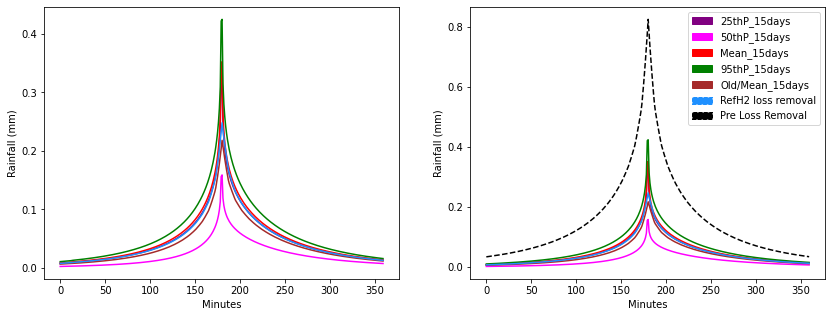

In [94]:
options = ['25thP_15days', "50thP_15days", 'Mean_15days', '95thP_15days', 'Old/Mean_15days', ""]
fig, axs = plt.subplots(1,2,  figsize = (14,5))
singlepeak_plot(axs[0],options, cols_dict, False)
singlepeak_plot(axs[1], options, cols_dict)

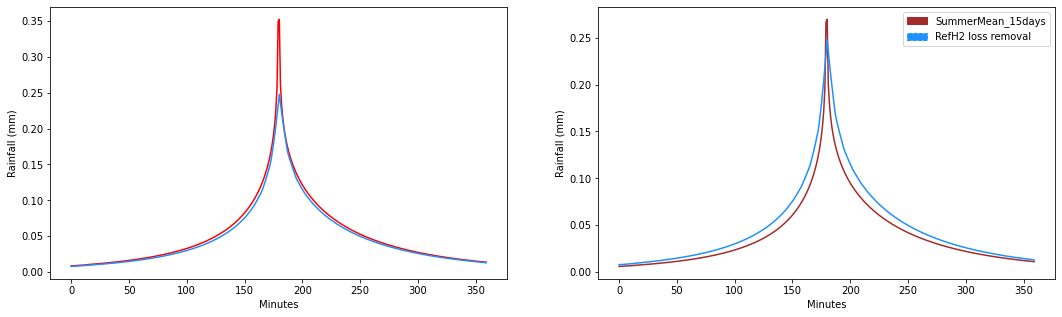

In [63]:
fig, axs = plt.subplots(1,2,  figsize = (18,5))
options = ["Mean_15days"]
cols_dict['0.51mm'] = 'darkgreen'
singlepeak_plot(axs[0],options, cols_dict, False)
options = ["SummerMean_15days"]
singlepeak_plot(axs[1], options, cols_dict, False)
# options = ["0.51mm_old_mean", "Mean_15days_summer"]
# singlepeak_plot(axs[2], options, cols_dict, False)